## Libraries Used

In [852]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [853]:
os.getcwd()

'/Users/karolylajko/Documents/Academy/DataScienceBootcamp2020/Projects/Capstone/HealthCare/data/dataset_diabetes'

In [854]:
os.listdir()

['healthcare.ipynb',
 'Load_Data_Diabetes and Initial EDA copy.ipynb',
 '.DS_Store',
 'before_model_diabdata.csv',
 'IDs_mapping.csv',
 'Richard EDA .ipynb',
 'diabetic_data.csv',
 'before_dummies.csv',
 'healthcare2.ipynb',
 '.ipynb_checkpoints']

## Helper Functions

In [855]:
# Plot Correlation Matrix
def plot_corr_matrix(df, nr_c, targ) :
    
    corr     = df.corr()
    corr_abs = corr.abs()
    cols     = corr_abs.nlargest(nr_c, targ)[targ].index
    cm       = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 12}, 
                yticklabels=cols.values, xticklabels=cols.values,cmap="OrRd")
    plt.show()

# IDC9 codes to diseas 
def idc_to_group (idcnum):
    # Hearth problems
    # External injury and suppl. class - generate 4 digit number - eval to other
    idcnum = idcnum.replace('V','9999').replace('E','9999').replace('?','9999')
    idcnum = float(idcnum) 
    if   390 <= idcnum <= 459 or idcnum == 785:
        diag = 'circulatory'
    # Lung issues
    elif 460 <= idcnum <= 519 or idcnum == 786:
        diag = 'respiratory'
    # Digestive - oral, stomac, abdominal, liver
    elif 520 <= idcnum <= 579 or idcnum == 787:
        diag = 'digestive'
    # Diabetes
    elif int(idcnum) == 250:
        diag = 'diabetis'
    # Injury or poisioning
    elif 800 <= idcnum <= 999:
        diag = 'injury'
    # Musc. system or connective tissue
    elif 710 <= idcnum <= 739:
        diag = 'musculoskeletal'
    # Kidney, urinary and genitals
    elif 580 <= idcnum <= 629 or idcnum == 788:
        diag = 'genitourinary'
    # Abnormal tissue Growth
    elif 140 <= idcnum <= 239 or idcnum in [780,781,782,784,790,791,792,793,794,795,796,797,798,799]:
        diag = 'neoplasms' 
    # Metabolic, immunity issue with no diabetes
    elif (240 <= idcnum <= 279 and idcnum != 250) or (680 <= idcnum <= 790):
        diag = 'neoplasms'
    elif 1 <= idcnum <= 139: 
        diag = 'neoplasms'
     # Other    
    else:
        diag = 'other'   
    return diag

# Convert age range to age average
def age_to_aveage (age):
    ages = ['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)']
    newage = ages.index(age)*10+5
    return newage

# Dummify a categorical variable column
# df - dataframe
# var - variable/feature string
# Prefix for dummies - string
# def makedummies(df,var, pre_fix = 'Class'):
#     Z = pd.get_dummies(df[var], prefix = pre_fix)
#     df_dummified = pd.concat((df.drop(var,1,inplace=True), Z), axis=1)
#     return df_dummified


# Patient either transferred home (healthy) or other care continues
def conv_disch_id(did):
    try: 
        if    did == 1: 
            result = 'home'
        else:
            result = 'other'
        return result
    except ValueError:
        print('Source ID must be interger!')
        
# Convert admission source ID to category groups
def conv_adms_id(sid):
    try: 
        if    sid == 7: 
            result = 'emergency'
        elif  sid == 1:
            result = 'phys_ref'
        elif sid  == 4:
            result = 'hospital'
        elif sid ==  6:
            result = 'snf'
        elif sid ==  2:
            result = 'clin_ref'
        else:
            result = 'other'
        return result
    except ValueError:
        print('Source ID must be interger!')

In [856]:
print('Reading in CSV files')
diabdata = pd.read_csv('diabetic_data.csv')
idmapping = pd.read_csv('IDs_mapping.csv')

Reading in CSV files


In [857]:
diabdata.diag_1.str.contains('V').sum()+ diabdata.diag_1.str.contains('E').sum()

1645

In [858]:
diabdata.head().transpose().head()

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)


In [859]:
diabdata[(diabdata['gender']!='Male') & (diabdata['gender']!='Female')]['gender']

30506    Unknown/Invalid
75551    Unknown/Invalid
82573    Unknown/Invalid
Name: gender, dtype: object

In [860]:
# Generating the indexes for the numerical and categorical variables
categorical_idx = diabdata.dtypes[diabdata.dtypes=='object'].index
numerical_idx   = diabdata.dtypes[diabdata.dtypes!='object'].index

In [861]:
print('The unique number of patients, keep only these rows? ')
diabdata.patient_nbr.value_counts().count()

The unique number of patients, keep only these rows? 


71518

In [862]:
print('The number of unique patient ids')
diabdata.drop_duplicates(subset= ['patient_nbr'], keep = 'first')['patient_nbr'].count()

The number of unique patient ids


71518

## Feature Overview

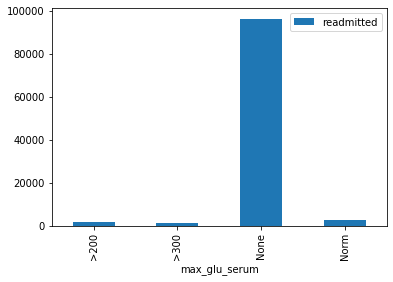

In [863]:
diabdata[['max_glu_serum','readmitted']].groupby(['max_glu_serum']).count().plot.bar()

In [864]:
diabdata['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [865]:
os.listdir()

['healthcare.ipynb',
 'Load_Data_Diabetes and Initial EDA copy.ipynb',
 '.DS_Store',
 'before_model_diabdata.csv',
 'IDs_mapping.csv',
 'Richard EDA .ipynb',
 'diabetic_data.csv',
 'before_dummies.csv',
 'healthcare2.ipynb',
 '.ipynb_checkpoints']

In [866]:
diabdata.shape

(101766, 50)

In [867]:
idmapping.shape

(67, 2)

In [868]:
idmapping.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
admission_type_id,1,2,3,4,5,6,7,8,NaN,discharge_disposition_id,...,17,18,19,20,21,22,23,24,25,26
description,Emergency,Urgent,Elective,Newborn,Not Available,NaN,Trauma Center,Not Mapped,NaN,description,...,NaN,Transfer From Another Home Health Agency,Readmission to Same Home Health Agency,Not Mapped,Unknown/Invalid,Transfer from hospital inpt/same fac reslt in...,Born inside this hospital,Born outside this hospital,Transfer from Ambulatory Surgery Center,Transfer from Hospice


## Jae Features

In [869]:
# my_columns = '''encounter_id, patient_nbr, admission_type_id, 
# discharge_disposition_id, admission_source_id, time_in_hospital, 
# num_lab_procedures, num_procedures, num_medications, number_outpatient, 
# number_emergency, number_inpatient, number_diagnoses, readmitted
# '''
# my_columns = my_columns.split(',')
# my_columns = [s.strip() for s in my_columns]
# my_columns
# set(my_columns) - set(diabdata.columns.tolist())

In [870]:
# myDF = diabdata[my_columns]
# myDF

In [871]:
# myDF.isna().sum()

In [872]:
print('Dischage Reasons: ')

diabdata.discharge_disposition_id.value_counts()[:10]

Dischage Reasons: 


1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
Name: discharge_disposition_id, dtype: int64

### ID Fileds
- The ID fields are integers but they are codes that need to be decoded and grouped into categories. Need one hot encoding after. 

admission_type_id: 

 1: 'Emergency',
 2: 'Urgent',
 3: 'Elective',
 4: 'Newborn',
 5: 'Not Available',
 6: nan,
 7: 'Trauma Center',
 8: 'Not Mapped'

discharge_disposition_id:

1: Discharged to Home
2: Another Hospital
3: Transferred a Skilled Nurse Fascility (SNF)
4: Transferred a Intensive Care Fasc. (ICF)
5: Transferred a Impatient Care Inst.
6: Transferred to Home with Home Health
11: Expired/Death
18: NULL
25: Not Mapped

admission_source_id:

1: Physician Referral
2: Clinic Referral
3: HMO Referral
4: Transfer from a hospital
5: Transfer from a Skilled Nursing Facility (SNF)
6: Transfer from another health care facility
7: Emergency Room
9: Not Available
17: NULL
20: Not Mapped



In [873]:
diabdata.discharge_disposition_id.value_counts()[:10]

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
Name: discharge_disposition_id, dtype: int64

In [874]:
# # Patient either transferred home (healthy) or other care continues
# def conv_disch_id(did):
#     try: 
#         if    did == 1: 
#             result = 'home'
#         else:
#             result = 'other'
#         return result
#     except ValueError:
#         print('Source ID must be interger!')

In [875]:
# # Convert admission source ID to category groups
# def conv_adms_id(sid):
#     try: 
#         if    sid == 7: 
#             result = 'emergency'
#         elif  sid == 1:
#             result = 'phys_ref'
#         elif sid  == 4:
#             result = 'hospital'
#         elif sid ==  6:
#             result = 'snf'
#         elif sid ==  2:
#             result = 'clin_ref'
#         else:
#             result = 'other'
#         return result
#     except ValueError:
#         print('Source ID must be interger!')

In [876]:
diabdata.admission_source_id.apply(lambda x: conv_adms_id(x))

0          phys_ref
1         emergency
2         emergency
3         emergency
4         emergency
            ...    
101761    emergency
101762        other
101763    emergency
101764    emergency
101765    emergency
Name: admission_source_id, Length: 101766, dtype: object

In [877]:
# Check if function works, non-mutating
diabdata.discharge_disposition_id.apply(lambda x: conv_disch_id(x))

0         other
1          home
2          home
3          home
4          home
          ...  
101761    other
101762    other
101763     home
101764    other
101765     home
Name: discharge_disposition_id, Length: 101766, dtype: object

In [878]:
# To map dictionary values to panda df columns keys set 1 -to - ID
def fix_dict_keys(mydict):
    j = 1
    temp_dict={}
    for key in mydict: 
        temp_dict[j] = mydict[key]
        j+=1
    return temp_dict
# --------------------------------------------------
# Extract the ID information from mapping data frame

# admission_type_id
ad_type_id_dict    = idmapping.iloc[0:8,]['description'].to_dict()

# discharge_disposition_id
discharge_id_dict  = idmapping.iloc[10:41,]['description'].to_dict()

# admission_source_id
adm_source_id_dict = idmapping.iloc[43:,]['description'].to_dict()

map_adm_type     = fix_dict_keys(ad_type_id_dict)
map_disch_type   = fix_dict_keys(discharge_id_dict)
map_source_type  = fix_dict_keys(adm_source_id_dict)

map_adm_type

{1: 'Emergency',
 2: 'Urgent',
 3: 'Elective',
 4: 'Newborn',
 5: 'Not Available',
 6: nan,
 7: 'Trauma Center',
 8: 'Not Mapped'}

## Univariate Data analysis
- Analyzing the features induvidually

In [879]:
print('The target Variable Classes')
diabdata.readmitted.value_counts()

The target Variable Classes


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [880]:
diabdata.diabetesMed.value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [881]:
# Value distribution of categorical Variables

# for col in diabdata.columns.tolist():
#     print(diabdata[col].value_counts())

In [882]:
print('Numerous categorical features')
# diabdata.dtypes

Numerous categorical features


In [883]:
print('The different types of data in the dataset: \n',diabdata.dtypes.value_counts())


The different types of data in the dataset: 
 object    37
int64     13
dtype: int64


## Data Cleaning
- Missing Values
- Outliers


In [884]:
# print('The unique number of patients, keep only these rows? ')
# diabdata.patient_nbr.value_counts().count()

# diabdata = diabdata.drop_duplicates(subset= ['patient_nbr'], keep = 'first') 

In [885]:
diabdata.shape

(101766, 50)

In [886]:
# Filtering rows by dropping fields with quesiton mark '?'
# diag codes
drop_Idx = drop_Idx.union(set(diabdata[diabdata['diag_1']                   == '?'].index)) # Unknown
drop_Idx = drop_Idx.union(set(diabdata[diabdata['diag_2']                   == '?'].index)) # Unknown
drop_Idx = drop_Idx.union(set(diabdata[diabdata['diag_3']                   == '?'].index)) # Unknown
drop_Idx = drop_Idx.union(set(diabdata[diabdata['discharge_disposition_id'] == 11].index))  # Death
drop_Idx = drop_Idx.union(set(diabdata[diabdata['gender']                   == 'Unknown/Invalid'].index))

new_Idx = list(set(diabdata.index) - set(drop_Idx))
diabdata = diabdata.iloc[new_Idx]

In [887]:
# diabdata[diabdata['diag_1']=='?']

In [888]:
diabdata.shape

(96446, 50)

In [889]:
# diabdata = diabdata[~(diabdata == '?').any(axis=1)]
# diabdata[~(diabdata == '?').any(axis=1)]

In [890]:
print('Missing Values per feature')
print('Top 10 variables of missing values')
diabdata.isnull().sum().sort_values(ascending=False)[:10]

Missing Values per feature
Top 10 variables of missing values


readmitted            0
num_lab_procedures    0
max_glu_serum         0
number_diagnoses      0
diag_3                0
diag_2                0
diag_1                0
number_inpatient      0
number_emergency      0
number_outpatient     0
dtype: int64

In [891]:
np.sum(diabdata.age.isnull())

0

In [892]:
diabdata[diabdata['gender']=='Unknown/Invalid']['gender']

Series([], Name: gender, dtype: object)

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

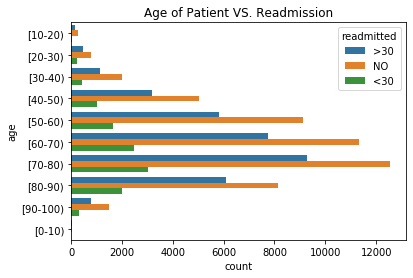

In [893]:
sns.countplot(y= diabdata['age'], hue = diabdata['readmitted']).set_title('Age of Patient VS. Readmission')

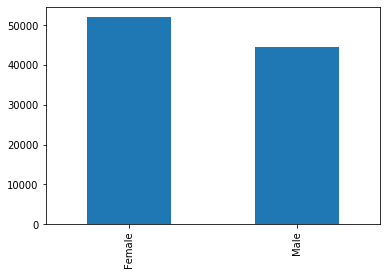

In [894]:
diabdata.gender.value_counts().plot.bar()

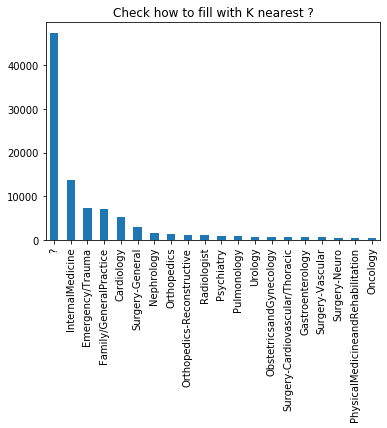

In [895]:

diabdata.medical_specialty.value_counts()[:20].plot.bar(title='Check how to fill with K nearest ?')

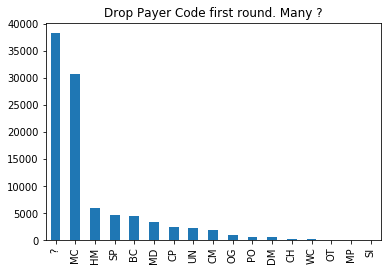

In [896]:
diabdata.payer_code.value_counts().plot.bar(title ='Drop Payer Code first round. Many ?')

In [897]:
diabdata.diag_1.value_counts()[:10]

428    6604
414    6348
786    3900
410    3383
486    3320
427    2665
491    2187
715    2069
780    1969
682    1954
Name: diag_1, dtype: int64

In [898]:
# diabdata.diag_2.value_counts()[:20]

In [899]:
# diabdata.diag_3.value_counts()


In [900]:
# diabdata.groupby('diag_1').count().sort_values('readmitted',ascending=False)[:30]

In [901]:
diagnosis = diabdata.loc[diabdata['readmitted']=='<30',['readmitted','diag_1','diag_2','diag_3']]
# percent_miss_count = (dftrain.isnull().sum()/dftrain.isnull().count()).sort_values(ascending=False)
#['diag_1','diag_2','diag_3']
# pd.concat([tot_miss_count,percent_miss_count], axis =1,keys=['NA_count','NA_percent'])[:20]

print
diagnosis.groupby('diag_1').count().sort_values('readmitted',ascending=False)[:30]['readmitted'].sum()


6793

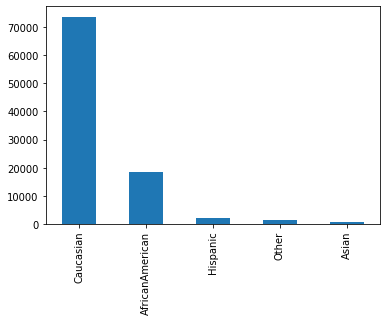

In [902]:
diabdata.race.value_counts().plot.bar()

In [903]:
# Getting rid of the Unknowns for Gender - not real significance
diabdata.gender = diabdata.gender.replace('Unknown/Invalid','Female')
diabdata.gender.value_counts()

Female    52006
Male      44440
Name: gender, dtype: int64

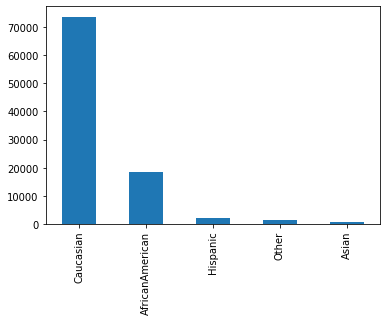

In [904]:
diabdata.race.value_counts().plot.bar()

In [905]:
# Take care of the race missing values and minority asian as outlier
diabdata.race = diabdata.race.replace('?','Missing').replace('Asian','Other').replace('Hispanic','Other')
diabdata.race.value_counts()

Caucasian          73835
AfricanAmerican    18560
Other               4051
Name: race, dtype: int64

In [906]:
# Following guideline filling in missing for '?'
diabdata.medical_specialty  = diabdata.medical_specialty.replace('?','Missing')

In [907]:
# Convert the discharge ID codes to group of classes 
diabdata.discharge_disposition_id = diabdata.discharge_disposition_id.apply(lambda x: conv_disch_id(x))

In [908]:
# Convert the admission source ID codes to group of classes 
diabdata.admission_source_id = diabdata.admission_source_id.apply(lambda x: conv_adms_id(x))

## Feature Engineering
- Grouping values within feature: IDC code (based on first 3 characters)
- One hot encoding
- Dummification

In [909]:
# Converting IDC9 iagnostic codes  to characters

diags = ['diag_1','diag_2','diag_3']
for diag in diags:
    diagt = str(diag + '_temp')
    diabdata[diagt] = diabdata[diag].apply(lambda x : idc_to_group(x))

Text(0.5, 1.0, 'Primary Diagnosis')

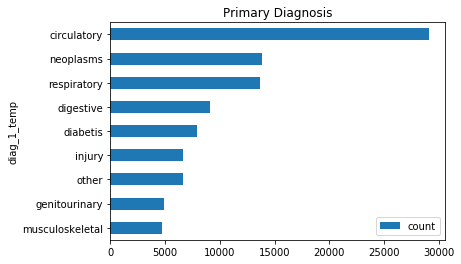

In [910]:
diabdata.groupby('diag_1_temp').agg({'diag_1':['count']})['diag_1'].sort_values('count').plot.barh() 
#,ascending=False
plt.title('Primary Diagnosis')

Text(0.5, 1.0, 'Secondary Diagnosis')

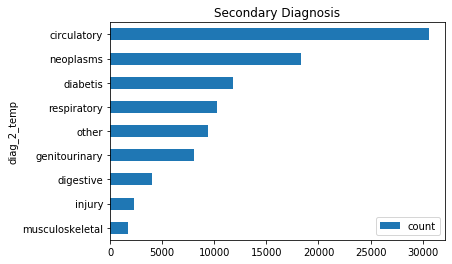

In [911]:
diabdata.groupby('diag_2_temp').agg({'diag_2':['count']})['diag_2'].sort_values('count').plot.barh()
plt.title('Secondary Diagnosis')

Text(0.5, 1.0, 'Third Diagnosis')

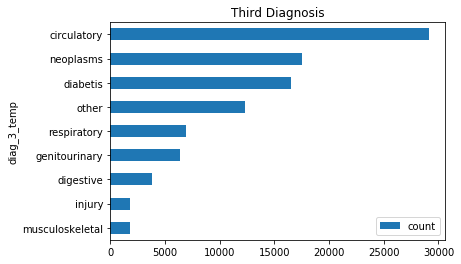

In [912]:
diabdata.groupby('diag_3_temp').agg({'diag_3':['count']})['diag_3'].sort_values('count').plot.barh()
plt.title('Third Diagnosis')

In [913]:
diabdata.diag_1.str.contains('V').sum()+ diabdata.diag_1.str.contains('E').sum()

1595

In [914]:
# Transform the target variable to those admitted before 30 days and others
diabdata.readmitted = diabdata.readmitted.apply(lambda x : 1 if x =='<30' else 0)

In [915]:
# Convert age range to ages
diabdata['newage'] = diabdata['age'].apply(lambda x: age_to_aveage(x) )
diabdata.newage.value_counts()

75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: newage, dtype: int64

In [916]:
diabdata.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_temp,diag_2_temp,diag_3_temp,newage
1,149190,55629189,Caucasian,Female,[10-20),?,1,home,emergency,3,...,No,No,No,Ch,Yes,0,neoplasms,diabetis,neoplasms,15
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,home,emergency,2,...,No,No,No,No,Yes,0,other,diabetis,other,25
3,500364,82442376,Caucasian,Male,[30-40),?,1,home,emergency,2,...,No,No,No,Ch,Yes,0,neoplasms,diabetis,circulatory,35
4,16680,42519267,Caucasian,Male,[40-50),?,1,home,emergency,1,...,No,No,No,Ch,Yes,0,neoplasms,neoplasms,diabetis,45
5,35754,82637451,Caucasian,Male,[50-60),?,2,home,clin_ref,3,...,No,No,No,No,Yes,0,circulatory,circulatory,diabetis,55


## Removing multiple visit for each patient that is indicated by patient_nbr
This ensures that observations are independent

In [917]:
print('The unique number of patients, keep only these rows? ')
diabdata.patient_nbr.value_counts().count()

diabdata = diabdata.drop_duplicates(subset= ['patient_nbr'], keep = 'first') 

The unique number of patients, keep only these rows? 


In [918]:
diabdata.shape

(67580, 54)

## Dropping Feature Columns

- patient_nbr: 
- encounter_id:
- payer_code: 
- max_glu_serum: 
- weight: Too many missing value
-
-


In [919]:
# Drop columns that are not needed

# cols_to_drop = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
#        'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
#        'time_in_hospital', 'payer_code', 'medical_specialty',
#        'num_lab_procedures', 'num_procedures', 'num_medications',
#        'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
#        'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
#        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
#        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
#        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
#        'tolazamide', 'examide', 'citoglipton', 'insulin',
#        'glyburide-metformin', 'glipizide-metformin',
#        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
#        'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
#        'newage']
cols_to_drop = ['encounter_id', 'patient_nbr', 'age', 'weight', 'admission_type_id',
                'payer_code', 'medical_specialty',
                'num_lab_procedures', 'num_procedures', 
                'number_outpatient', 'number_emergency', 'number_inpatient', 
                'number_diagnoses', 'max_glu_serum', 'A1Cresult',
                'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone','diag_1','diag_2','diag_3',
                'diag_2_temp','diag_3_temp']


diabdata.drop(cols_to_drop, inplace= True, axis = 1)



In [920]:
diabdata.head()

,race,gender,discharge_disposition_id,admission_source_id,time_in_hospital,num_medications,change,diabetesMed,readmitted,diag_1_temp,newage
1,Caucasian,Female,home,emergency,3,18,Ch,Yes,0,neoplasms,15
2,AfricanAmerican,Female,home,emergency,2,13,No,Yes,0,other,25
3,Caucasian,Male,home,emergency,2,16,Ch,Yes,0,neoplasms,35
4,Caucasian,Male,home,emergency,1,8,Ch,Yes,0,neoplasms,45
5,Caucasian,Male,home,clin_ref,3,16,No,Yes,0,circulatory,55


In [921]:
# Save data before modification dummification
diabdata.to_csv('before_dummies.csv')

## DROP rows for the same person

## One Hot Encoing of categorical features

In [922]:
diabdata2 = pd.read_csv('before_dummies.csv',index_col=0)
diabdata2.columns

Index(['race', 'gender', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_medications', 'change', 'diabetesMed',
       'readmitted', 'diag_1_temp', 'newage'],
      dtype='object')

In [923]:
prefix = 'class1'
step1 = pd.get_dummies(diabdata2['diag_1_temp'], prefix = 'class1')

diabdata2 = pd.concat([diabdata2,step1], axis=1)
diabdata2.drop('diag_1_temp',1,inplace=True)
diabdata2.drop(str(prefix+'_'+'diabetis'),axis=1,inplace=True)

In [924]:
diabdata2.shape

(67580, 18)

In [925]:
print(diabdata2.shape)
diabdata2.head()

(67580, 18)


,race,gender,discharge_disposition_id,admission_source_id,time_in_hospital,num_medications,change,diabetesMed,readmitted,newage,class1_circulatory,class1_digestive,class1_genitourinary,class1_injury,class1_musculoskeletal,class1_neoplasms,class1_other,class1_respiratory
1,Caucasian,Female,home,emergency,3,18,Ch,Yes,0,15,0,0,0,0,0,1,0,0
2,AfricanAmerican,Female,home,emergency,2,13,No,Yes,0,25,0,0,0,0,0,0,1,0
3,Caucasian,Male,home,emergency,2,16,Ch,Yes,0,35,0,0,0,0,0,1,0,0
4,Caucasian,Male,home,emergency,1,8,Ch,Yes,0,45,0,0,0,0,0,1,0,0
5,Caucasian,Male,home,clin_ref,3,16,No,Yes,0,55,1,0,0,0,0,0,0,0


In [926]:
# prefix = 'class2'
# step2 = pd.get_dummies(diabdata2['gender'], prefix = 'class2')

# diabdata2 = pd.concat([diabdata2,step2], axis=1)
diabdata2.drop('gender',1,inplace=True)
# diabdata2.drop(str(prefix+'_'+'Male'),axis=1,inplace=True)
# diabdata2.shape

In [927]:
prefix = 'class3'
step3 = pd.get_dummies(diabdata2['race'], prefix = 'class3')# drop_first=True

diabdata2 = pd.concat([diabdata2,step3], axis=1)
diabdata2.drop('race',1,inplace=True)
diabdata2.drop(str(prefix+'_'+'AfricanAmerican'),axis=1,inplace=True)
diabdata2.shape

(67580, 18)

In [928]:
# prefix = 'class4'
# step4 = pd.get_dummies(diabdata2['change'], prefix = 'class4')

# diabdata2 = pd.concat([diabdata2,step4], axis=1)
diabdata2.drop('change',1,inplace=True)
# diabdata2.drop(str(prefix+'_'+'Male'),axis=1,inplace=True)
# diabdata2.shape

In [929]:
# prefix = 'class5'
# step5 = pd.get_dummies(diabdata2['diabetesMed'], prefix = 'class5')

# diabdata2 = pd.concat([diabdata2,step5], axis=1)
diabdata2.drop('diabetesMed',1,inplace=True)
# diabdata2.drop(str(prefix+'_'+'Male'),axis=1,inplace=True)
# diabdata2.shape

In [930]:
diabdata2.head()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_medications,readmitted,newage,class1_circulatory,class1_digestive,class1_genitourinary,class1_injury,class1_musculoskeletal,class1_neoplasms,class1_other,class1_respiratory,class3_Caucasian,class3_Other
1,home,emergency,3,18,0,15,0,0,0,0,0,1,0,0,1,0
2,home,emergency,2,13,0,25,0,0,0,0,0,0,1,0,0,0
3,home,emergency,2,16,0,35,0,0,0,0,0,1,0,0,1,0
4,home,emergency,1,8,0,45,0,0,0,0,0,1,0,0,1,0
5,home,clin_ref,3,16,0,55,1,0,0,0,0,0,0,0,1,0


In [931]:
prefix = 'class6'
step6 = pd.get_dummies(diabdata2['discharge_disposition_id'], prefix = 'class6')

diabdata2 = pd.concat([diabdata2,step6], axis=1)
diabdata2.drop('discharge_disposition_id',1,inplace=True)
diabdata2.drop(str(prefix+'_'+'home'),axis=1,inplace=True)
diabdata2.shape

(67580, 16)

In [932]:
prefix = 'class7'
step7 = pd.get_dummies(diabdata2['admission_source_id'], prefix = 'class7')

diabdata2 = pd.concat([diabdata2,step7], axis=1)
diabdata2.drop('admission_source_id',1,inplace=True)
diabdata2.drop(str(prefix+'_'+'emergency'),axis=1,inplace=True)
diabdata2.shape

(67580, 20)

In [933]:
diabdata2.columns.to_list()

['time_in_hospital',
 'num_medications',
 'readmitted',
 'newage',
 'class1_circulatory',
 'class1_digestive',
 'class1_genitourinary',
 'class1_injury',
 'class1_musculoskeletal',
 'class1_neoplasms',
 'class1_other',
 'class1_respiratory',
 'class3_Caucasian',
 'class3_Other',
 'class6_other',
 'class7_clin_ref',
 'class7_hospital',
 'class7_other',
 'class7_phys_ref',
 'class7_snf']

In [934]:
diabdata2.to_csv('before_model_diabdata.csv')

In [935]:
diabdata3 = pd.read_csv('before_model_diabdata.csv',index_col=0)
diabdata3.columns

Index(['time_in_hospital', 'num_medications', 'readmitted', 'newage',
       'class1_circulatory', 'class1_digestive', 'class1_genitourinary',
       'class1_injury', 'class1_musculoskeletal', 'class1_neoplasms',
       'class1_other', 'class1_respiratory', 'class3_Caucasian',
       'class3_Other', 'class6_other', 'class7_clin_ref', 'class7_hospital',
       'class7_other', 'class7_phys_ref', 'class7_snf'],
      dtype='object')

## Standardize Data 
- Only if needed
- Standardize features by removing the mean and scaling to unit variance

- The standard score of a sample x is calculated as:

- *z = (x - u) / s*

In [936]:
# Create the standardized version of the datasets

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaler.fit(diabdata3.drop('readmitted',1))
# diabdata_scaled = scaler.transform(diabdata3.drop('readmitted',1))
# # dftrain_y_scaled = scaler.transform(dftrain['SalePrice']) # not needed?


## Create Train and Test data
- To avoid overfitting it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

- Split the ***diabetes*** dataset into random train and test subsets
- There is option to stratify by setting 

In [937]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split

X = diabdata3.drop('readmitted',1)

y = diabdata3.readmitted


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

## Bootstrapping and SMOTE Synthetic Minority Over-Sampling Technique
- Upsampling minory class to create balanced dataset

## Cross Validation and Grid Search
 

In [938]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn                 import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split
from sklearn.linear_model    import LogisticRegression, SGDClassifier

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# First Run
diabetes_model = LogisticRegression(solver='liblinear')

# Second Run
# diabetes_model = LogisticRegression(solver='liblinear',class_weight='balanced')

# evaluate model
scores = cross_val_score(diabetes_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))


# gridsearch_logit = GridSearchCV(logit, parameters, cv = 5, verbose=1 , scoring = 'Accuracy')
# print('Gridsearch Object Best Score: ',grid_logit.best_score_)

Mean ROC AUC: 0.594


In [939]:
scores

array([0.60011136, 0.58230947, 0.57573141, 0.58906505, 0.61415408,
       0.6045225 , 0.57194863, 0.5876917 , 0.59710703, 0.61327501,
       0.59373817, 0.60647211, 0.56430865, 0.60649391, 0.58031796,
       0.59499173, 0.57955216, 0.59855463, 0.58780958, 0.62028373,
       0.6090715 , 0.58887375, 0.61050701, 0.59320649, 0.58949889,
       0.60954952, 0.58754645, 0.58265682, 0.58741611, 0.58679231])

## Fit Model

It allows the Ridge or Lasso penality with the hyperparameter  𝛼
α
  (we call it  𝜆
λ
  in the class), default =  1𝑒−4
1
e
−
4
 .
We choose either Ridge or Lasso by assigning the penalty = 'Ridge', penality = 'Lasso', with default = 'Ridge'
It has a parameter controlling the maximal iterations called max_iter, default to  100
100
 .
a parameter called solver, which accepts the solver option 'liblinear' of LogisticRegression. But when the solver is set to be sgd, it switches to a Stochastic Gradient Descent logistic classifier.
It has two standard model attributes coef_, intercept_.
it has the standard APIs of
fit(X, Y)
predict(X)
predict_proba(X)
score(X, Y)
set_params()
get_params()

In [940]:
from sklearn.linear_model    import LogisticRegression, SGDClassifier
from sklearn.metrics         import accuracy_score, f1_score, recall_score
# from sklearn.tree            import DecisionTreeClassifier
# from sklearn.ensemble        import RandomForestRegressor

print('Using Logistic Regression')

# First Attempt
#diab_logit = LogisticRegression(solver='liblinear')
#Second Attempt
diab_logit = LogisticRegression(solver='liblinear',class_weight='balanced') 

diab_logit.fit(X_train,y_train)

y_pred = diab_logit.predict(X_test)

# Checking the accuracy value
print('The accuracy score',accuracy_score(y_test, y_pred))




Using Logistic Regression
The accuracy score 0.6171944362237348


In [941]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.63      0.75     18438
           1       0.12      0.53      0.20      1836

    accuracy                           0.62     20274
   macro avg       0.53      0.58      0.47     20274
weighted avg       0.86      0.62      0.70     20274



In [942]:
diab_logit

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [943]:
diab_logit.classes_

array([0, 1])

In [944]:
y_pred = diab_logit.predict(X_test)

In [945]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11534,  6904],
       [  857,   979]])

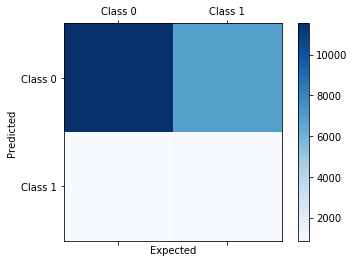

In [946]:
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax  = fig.add_subplot(111)
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)

fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.show()

## Model Evaluation

- **Accuracy**: Algorithms are designed to maximize accuracy and reduce error. 
    Not good for imbalanced dataset. 
    
    
- **Precision**: the number of true positives divided by all positive prediction.

    Precision = True Positive / True Positive + False Positive
    
    Precision is also called Positive Predictive Value. It is a measure of 
    classifier’s exactness. Low precision indicates a high number of false positives.
    
- **Confusion Matrix**: a table showing correct predictions and types of incorrect predictions.
-
- **Recall**: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
-
- **F1 Score**: the weighted average of precision and recall.

In [947]:
# # diad_logit = LogisticRegression(solver='liblinear')
# # diab_logit.fit(X_train,y_train)
 
# # Predict on training set
# diab_pred = diab_logit.predict(X_test)

# # Checking accuracy
# accuracy_score(y_test, diab_pred)

# # F1 score
# f1_score    (y_test, diab_pred)

# # Recall score
# recall_score(y_test, diab_pred)


## Plotting the ROC curve
- ROC is a probability curve and AUC represents degree or measure of 
separability. It tells how much model is capable of distinguishing 
between classes. Higher the AUC, better the model is at predicting 
0s as 0s and 1s as 1s. 
- Higher the AUC, better the model 
is at distinguishing between patients with disease and no disease.
- Need upsampling of class or weight settings for minority class

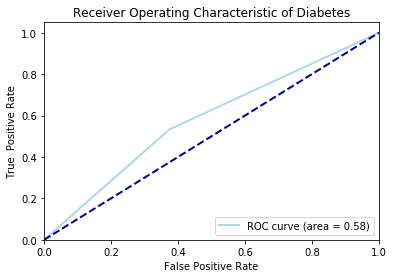

In [948]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

diab_logit.fit(X_train,y_train)

y_pred = diab_logit.predict(X_test)

# false posite rate, true porsitive rate
fpr, tpr, _ = roc_curve(y_test, y_pred)

roc_auc  = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='lightblue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True  Positive Rate')
plt.title('Receiver Operating Characteristic of Diabetes')
plt.legend(loc='lower right')
plt.show()